In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('weight-height-updated.csv')

In [4]:
df.head()

,Gender,Height,Weight,Born_Year
0,Male,73.847017,241.893563,1967.0
1,Male,68.781904,162.310473,1977.0
2,Male,74.110105,212.740856,1991.0
3,Male,71.730978,220.042470,1998.0
4,Male,69.881796,206.349801,1985.0


In [6]:
df.tail()

,Gender,Height,Weight,Born_Year
9995,Female,66.172652,136.777454,2003.0
9996,Female,67.067155,170.867906,NaN
9997,Female,63.867992,128.475319,2002.0
9998,Female,69.034243,163.852461,1983.0
9999,Female,61.944246,113.649103,1986.0


In [7]:
df.isnull().sum()

Gender          0
Height          0
Weight          0
Born_Year    1000
dtype: int64

In [64]:
years = df['Born_Year'].mode()[0]

In [65]:
df['Born_Year'].fillna(years, inplace=True)

In [66]:
df.isnull().sum()

Gender          0
Height          0
Weight          0
Born_Year       0
current_year    0
dtype: int64

In [67]:
df.head(30)

,Gender,Height,Weight,Born_Year,current_year
0,Male,73.847017,241.893563,1967.0,2025
1,Male,68.781904,162.310473,1977.0,2025
2,Male,74.110105,212.740856,1991.0,2025
3,Male,71.730978,220.042470,1998.0,2025
4,Male,69.881796,206.349801,1985.0,2025
5,Male,67.253016,152.212156,1967.0,2025
6,Male,68.785081,183.927889,1987.0,2025
7,Male,68.348516,167.971110,1983.0,2025
8,Male,67.018950,175.929440,1995.0,2025
9,Male,63.456494,156.399676,1995.0,2025


In [68]:
def curr_calc():
    curr_year = ['2025']
    curr_1 = []
    for i in curr_year:
        years = curr_year*10000
        curr_1.append(years)
    return years

In [69]:
current_year=curr_calc() 

In [70]:
df['current_year'] = current_year

In [71]:
df.head()

,Gender,Height,Weight,Born_Year,current_year
0,Male,73.847017,241.893563,1967.0,2025
1,Male,68.781904,162.310473,1977.0,2025
2,Male,74.110105,212.740856,1991.0,2025
3,Male,71.730978,220.042470,1998.0,2025
4,Male,69.881796,206.349801,1985.0,2025


In [72]:
df['age']= df['current_year'].astype(int)-df['Born_Year'].astype(int)

In [73]:
df.isnull().sum()

Gender          0
Height          0
Weight          0
Born_Year       0
current_year    0
age             0
dtype: int64

In [74]:
df.head()

,Gender,Height,Weight,Born_Year,current_year,age
0,Male,73.847017,241.893563,1967.0,2025,58
1,Male,68.781904,162.310473,1977.0,2025,48
2,Male,74.110105,212.740856,1991.0,2025,34
3,Male,71.730978,220.042470,1998.0,2025,27
4,Male,69.881796,206.349801,1985.0,2025,40


In [75]:
#BMI
#Body mass index - weight/height**2

def calc_bmi():
    height = df['Height']
    weight = df['Weight']
    bmi = []
    for h, w in zip(height, weight):
        bmi_1 = w/(h**2)
        bmi.append(bmi_1)
    return bmi_1

In [76]:
bmi_2 = calc_bmi()

In [77]:
df['Bmi']= bmi_2

In [78]:
df.head()

,Gender,Height,Weight,Born_Year,current_year,age,Bmi
0,Male,73.847017,241.893563,1967.0,2025,58,0.029619
1,Male,68.781904,162.310473,1977.0,2025,48,0.029619
2,Male,74.110105,212.740856,1991.0,2025,34,0.029619
3,Male,71.730978,220.042470,1998.0,2025,27,0.029619
4,Male,69.881796,206.349801,1985.0,2025,40,0.029619


In [83]:
# underweight > 18.5
# normal weight < 18.5 > 24.9
# overweight >

def BMI_category(bmi):
    if bmi < 18.5:
        return 'Under-weight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 25 <= bmi <29:
        return 'Overweight'
    else:
        return 'Obese'

In [84]:
df['BMI_Category'] = df['BMI'].apply(BMI_category)

In [85]:
df.head()

,Gender,Height,Weight,Born_Year,current_year,age,Bmi,Height(m),Weight(kg),BMI,BMI_Category
0,Male,73.847017,241.893563,1967.0,2025,58,0.029619,1.875714,109.720985,31.185761,Obese
1,Male,68.781904,162.310473,1977.0,2025,48,0.029619,1.747060,73.622732,24.121044,Normal Weight
2,Male,74.110105,212.740856,1991.0,2025,34,0.029619,1.882397,96.497550,27.232906,Overweight
3,Male,71.730978,220.042470,1998.0,2025,27,0.029619,1.821967,99.809504,30.067059,Obese
4,Male,69.881796,206.349801,1985.0,2025,40,0.029619,1.774998,93.598619,29.708033,Obese


In [79]:
# inches to . - 0.0254
#pounds to kg - 0.453592
df['Height(m)'] = df['Height']*0.0254
df['Weight(kg)'] = df['Weight']*0.453592

In [80]:
df['BMI'] = df['Weight(kg)']/(df['Height(m)']**2)

In [81]:
df.head()

,Gender,Height,Weight,Born_Year,current_year,age,Bmi,Height(m),Weight(kg),BMI
0,Male,73.847017,241.893563,1967.0,2025,58,0.029619,1.875714,109.720985,31.185761
1,Male,68.781904,162.310473,1977.0,2025,48,0.029619,1.747060,73.622732,24.121044
2,Male,74.110105,212.740856,1991.0,2025,34,0.029619,1.882397,96.497550,27.232906
3,Male,71.730978,220.042470,1998.0,2025,27,0.029619,1.821967,99.809504,30.067059
4,Male,69.881796,206.349801,1985.0,2025,40,0.029619,1.774998,93.598619,29.708033


In [86]:
# w/(h**2)
df['Height'] = df['Height']*0.0254
df['Weight'] = df['Weight']*0.453592

In [87]:
df.head()

,Gender,Height,Weight,Born_Year,current_year,age,Bmi,Height(m),Weight(kg),BMI,BMI_Category
0,Male,1.875714,109.720985,1967.0,2025,58,0.029619,1.875714,109.720985,31.185761,Obese
1,Male,1.747060,73.622732,1977.0,2025,48,0.029619,1.747060,73.622732,24.121044,Normal Weight
2,Male,1.882397,96.497550,1991.0,2025,34,0.029619,1.882397,96.497550,27.232906,Overweight
3,Male,1.821967,99.809504,1998.0,2025,27,0.029619,1.821967,99.809504,30.067059,Obese
4,Male,1.774998,93.598619,1985.0,2025,40,0.029619,1.774998,93.598619,29.708033,Obese


### CHARTS
1. pie chart  
2. bar chart
3. column chart
4. Line chart


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [92]:
pip install seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 1.2 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.1 MB 1.2 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.0 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/8.1 MB 1.0 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.1 MB 975.2 kB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.1 MB 975.2 kB/s eta 0:00:07
   ------- -------------------------------- 1.6/8.1 MB 855.9 kB/s eta 0:00:08
   ------- -------------------------------- 1.6/8.1 MB 855.9 kB/s eta 0:00:08
   --------- ---------------------

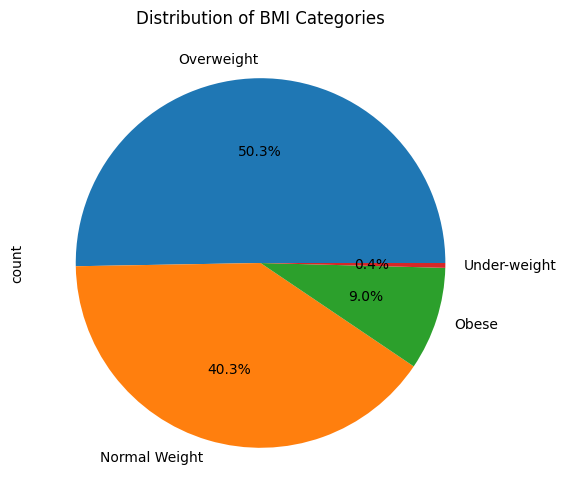

In [95]:
plt.figure(figsize=(6,6))
df['BMI_Category'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Distribution of BMI Categories')
plt.ylabel('count')
plt.show()

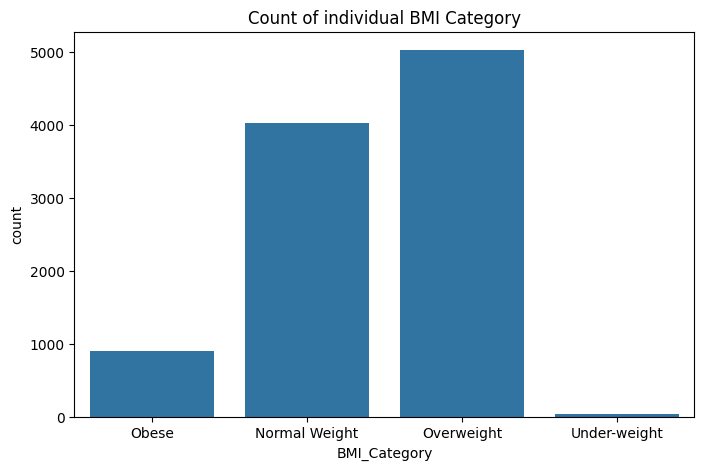

In [97]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x= 'BMI_Category')
plt.title('Count of individual BMI Category')
plt.show()